# Problem Statement
In this problem, we want to study the orbit of a comet, whose <a href='https://en.wikipedia.org/wiki/Astrometry'>astrometry</a> data is provided. For this problem, make the following three important simplifying assumptions -
<ol><li> The orbit of the earth is perfectly circular with radius = 1<a href='https://en.wikipedia.org/wiki/Astronomical_unit'>AU</a> and time period = 1 year</li>
    <li> The orbit of the comet is coplanar to the orbit of the earth </li>
    <li> Gravitational effects of the earth on the comet can be neglected</li>
</ol>
As usual, <a href='https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion'>Kepler's laws of planetary motion</a> are obeyed by all orbits.
An astronomer (sitting on earth, naturally) has measured the distance of a certain comet from earth and the angle between the comet and the sun, as seen from earth (where a negative sign indicates that the comet is to the west of the sun). The time of observation after the first observation (in years), distance between earth and the comet (in AU) and the angle between the sun and the comet (in radians) is given in the data file CometData.csv. 

Your task, should you choose to attempt this problem, is to help the astronomer to determine whether the comet is moving in an elliptical or hyperbolic orbit around the sun, and what the time period is (if elliptic) or the distance of closest approach to the sun (if hyperbolic).

You should submit a small writeup about your approach/method to this problem (can be a scanned handwritten document) and a jupyter notebook that implements this approach. You should explicitly calculate the eccentricity, and time period or distance of closest approach of the orbit (and include this value at the end of your writeup). Additionally, make a scatterplot of the position of the comet with respect to the sun. 

# Hints
We expect that you are familiar with basic python (vanilla python, numpy,function and matplotlib) which is covered in the first four notebooks of <a href= 'https://github.com/krittikaiitb/tutorials'> Krittika Python Tutorials</a>. Apart from this, the following resources/hints might be specifically useful for this problem.
### 1) Polar equation of Conic sections
The equation of a general conic section, with eccentricity $e$ and length of semilatus-rectum $r_0$ is given by $$r(\theta) = \frac{r_0}{1+e \cos(\theta - \theta_0)}$$ where the focus of this conic section is at the origin and $\theta_0$ is the angle of 'tilting'. Recall further that $r_0 = a(1-e^2)$ where $a$ is the length of semimajor axis.
### 2) scipy.optimize.curve_fit
This library function can help you to fit a function to some given data. Official documentation for this function is given at <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html'>this link</a>. This is also covered in Tutorial 7 of the <a href= 'https://github.com/krittikaiitb/tutorials'> Krittika Python Tutorials</a>
### 3) Polar plots with matplotlib
Making polar plots with matplotlib is understandably important for this question. A demo of a polar scatter plot is provided in official matplotlib documentation at <a href='https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html'>this link</a>. A similar demo for a line plot is given <a href='https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html'>here</a>.

<h2>My Solution to the Problem:</h2>

In [3]:
#installing modules
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install lmfit
print("*********************************************************************************************************")
#importing modules
import math
import numpy as np
print('Numpy version:', np.__version__)
import pandas as pd
print('Pandas version:', pd.__version__)
import matplotlib
print('Matplotlib version:', matplotlib.__version__)
from matplotlib import pyplot as plt
import scipy
print('Scipy version:',scipy.__version__)
from scipy.optimize import curve_fit as cf
import lmfit
print('lmfit version:', lmfit.__version__)
from lmfit import Model

#################################################################################
print("All modules have been successfully imported!")
#################################################################################

*********************************************************************************************************
Numpy version: 1.19.5
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Scipy version: 1.6.0
lmfit version: 1.0.2
All modules have been successfully imported!


In [4]:
#Reading the data
#################################################################################

df = pd.read_csv('CometData.csv')

#Making arrays
#################################################################################

time = []
distance = []
angle = []
for i in range(0,100):
    df1=df.iloc[i,:]
#The array of time of observation after the first observation (in years)
    time.append(df1[0])
#The array of distance between earth and the comet (in AU)
    distance.append(df1[1])
#The array of angle between the sun and the comet (in radians)
    angle.append((df1[2]))

##################################################################################       
print("All the data have been stored!")
#################################################################################

All the data have been stored!


In [5]:
#Required functions
##################################################################################

def get_distance(a,b,theta):
    c = np.sqrt(a**2+b**2-2*a*b*np.cos(theta))
    return c
#print(get_distance(1,1,np.pi/2))

def get_angle(a,b,c):
    C = (a**2+b**2-c**2)/(2*a*b)
    return np.arccos(C)
#print(get_angle(1,1,np.sqrt(2)))

def from_date(n):
    m = n-n//1
    m = 2*np.pi*m
    if m>np.pi:
        return m-2*np.pi
    else:
        return m
    
#################################################################################
print("All good to go to next step!")
#################################################################################

All good to go to next step!


In [6]:
#Distance between the sun and the comet
#################################################################################

distances = []
for i in range(0,100):
    distances.append(get_distance(1,distance[i],angle[i]))

#Angle of comet from inital sun-earth position
#################################################################################

angles = []
for i in range(0,100):
    if angle[i]>=0:
        angles.append(from_date(time[i])-get_angle(1,distances[i],distance[i]))
    else:
        angles.append(from_date(time[i])+get_angle(1,distances[i],distance[i]))

#################################################################################
print("Comet's position around sun has been traced successfully!")
#################################################################################

Comet's position around sun has been traced successfully!


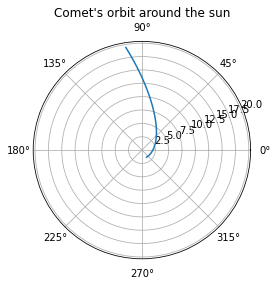

In [7]:
#Plot of comet orbit with sun at the origin
#################################################################################
r = distances
theta = angles
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta,r)
ax.set_title("Comet's orbit around the sun")
plt.show()

In [8]:
#Equation of a general conic section
#################################################################################
def conic(theta,l,e,theta_0):
    return l/(1+e*np.cos(theta-theta_0))

#Best fit conic for the comet
#################################################################################
gmodel = Model(conic)
result = gmodel.fit(distances, theta=angles, l=10, e=0,theta_0=0)
beta = list(result.values.values())
l = beta[0]
e = beta[1]
theta_0 = beta[2]



#Results
#################################################################################
print("Eccentricity of the orbit:",e)
if 0<e<1:
    print("The comet follows an elliptical orbit!")
else:
    print("The comet follows a hyperbolic orbit!")
print("Semi-latus rectum:",l,"AU")
print("Tilt:",theta_0)

#Getting a report of the vales of parameters and the errors involved
#################################################################################
print(result.fit_report())

Eccentricity of the orbit: 0.9199999999999987
The comet follows an elliptical orbit!
Semi-latus rectum: 3.0719999999999326 AU
Tilt: -1.0000000000000138
[[Model]]
    Model(conic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 123
    # data points      = 100
    # variables        = 3
    chi-square         = 7.1497e-24
    reduced chi-square = 7.3708e-26
    Akaike info crit   = -5784.01461
    Bayesian info crit = -5776.19910
[[Variables]]
    l:        3.07200000 +/- 1.2514e-13 (0.00%) (init = 10)
    e:        0.92000000 +/- 4.2101e-15 (0.00%) (init = 0)
    theta_0: -1.00000000 +/- 2.5506e-14 (0.00%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(l, theta_0) =  0.981
    C(e, theta_0) =  0.911
    C(l, e)       =  0.817


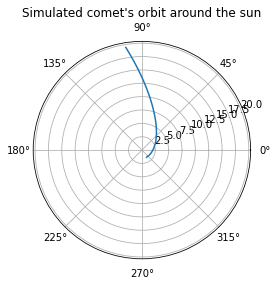

This is exactly the comet's orbit as obtained above!


In [9]:
#Verifying the obtained results
#################################################################################
r_new = []
for i in range(100):
    r_new.append(l/(1+e*np.cos(theta[i]-theta_0)))
theta = angles
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r_new)
ax.set_title("Simulated comet's orbit around the sun")
plt.show()
print("This is exactly the comet's orbit as obtained above!")

In [10]:
#Time period from Kepler's law
#################################################################################
a = l/(1-e**2)
print("Semi-major axis:",a,"AU")
T = np.sqrt(a**3)
print("Time period of revolution of the comet around the sun:",T,"years")

Semi-major axis: 19.999999999999247 AU
Time period of revolution of the comet around the sun: 89.44271909998653 years


Full orbit of the comet around the sun:


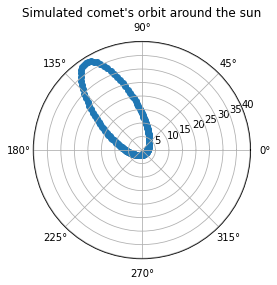

An ellipse as calculated above!


In [11]:
#Simulating the path of comet around the sun
#################################################################################
print("Full orbit of the comet around the sun:")
r_new = []
theta_new = np.linspace(0, 2*np.pi, 256)
for i in range(len(theta_new)):
    r_new.append(l/(1+e*np.cos(theta_new[i]-theta_0)))
theta = angles
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta_new, r_new)
ax.set_title("Simulated comet's orbit around the sun")
plt.show()
print("An ellipse as calculated above!")

<em>Eccentricity of the elliptical orbit is around 0.92.</em>
<em>Time period of revolution is around 89.5 years.</em>